In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from pandas import DataFrame
from matplotlib import pyplot
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.tsa.stattools as tsa
from statsmodels.tsa.stattools import adfuller
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y')
from statsmodels.tsa.stattools import acf, pacf

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y')

In [3]:
df=pd.read_csv("VA_UnemploymentRate.csv", header=0, parse_dates=[0],index_col=0,date_parser=dateparse)

In [4]:
#df.index

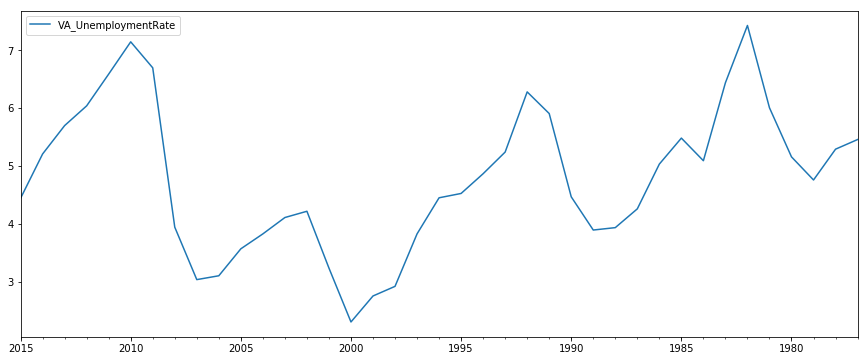

In [5]:
df.plot(figsize=(15, 6))
plt.show()

In [6]:
rolmean = pd.rolling_mean(df, window=5)

C:\Users\Vaidehi Deshpande\Miniconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=5).mean()
  if __name__ == '__main__':


In [7]:
rolstd = pd.rolling_std(df, window=5)

C:\Users\Vaidehi Deshpande\Miniconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=5).std()
  if __name__ == '__main__':


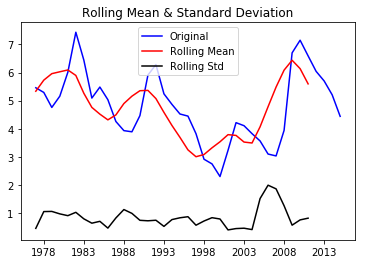

In [8]:
orig = plt.plot(df, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

# Decomposition 

In [9]:
decomposition = seasonal_decompose(df)

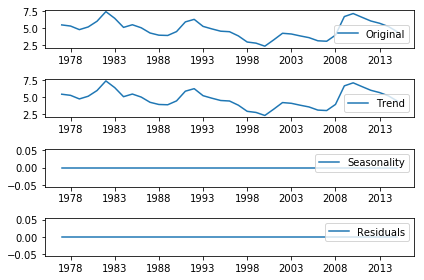

In [10]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Stationarity

In [11]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=5)
    rolstd = pd.rolling_std(timeseries, window=5)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries.ix[:,0], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

C:\Users\Vaidehi Deshpande\Miniconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=5).mean()
C:\Users\Vaidehi Deshpande\Miniconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=5).std()


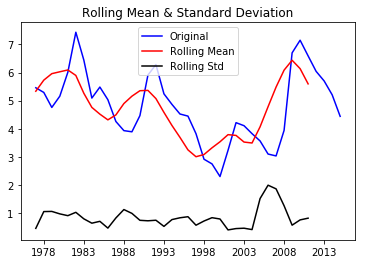

Results of Dickey-Fuller Test:
Test Statistic                 -2.262503
p-value                         0.184347
#Lags Used                      2.000000
Number of Observations Used    36.000000
Critical Value (10%)           -2.611671
Critical Value (1%)            -3.626652
Critical Value (5%)            -2.945951
dtype: float64


In [12]:
test_stationarity(df)

In [13]:
df_log=np.log(df)

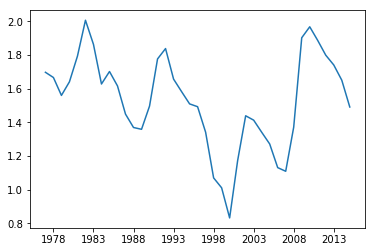

In [14]:
plt.plot(df_log)
plt.show()

In [15]:
#df_log

C:\Users\Vaidehi Deshpande\Miniconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=5).mean()
C:\Users\Vaidehi Deshpande\Miniconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=5).std()


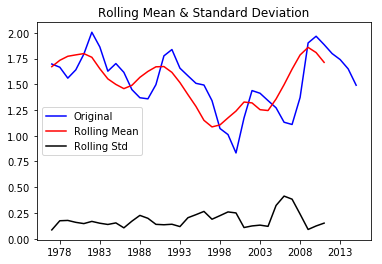

Results of Dickey-Fuller Test:
Test Statistic                 -3.172961
p-value                         0.021604
#Lags Used                      1.000000
Number of Observations Used    37.000000
Critical Value (10%)           -2.610400
Critical Value (1%)            -3.620918
Critical Value (5%)            -2.943539
dtype: float64


In [15]:
test_stationarity(df_log)

14.0324230469


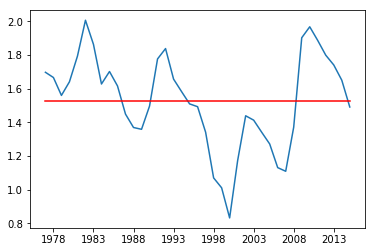

-19.461689671059247


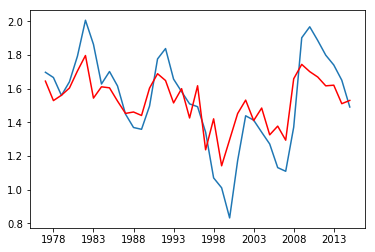

-24.775604463577707


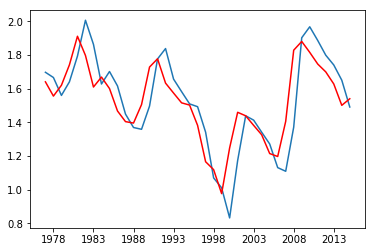

-34.636634408478415


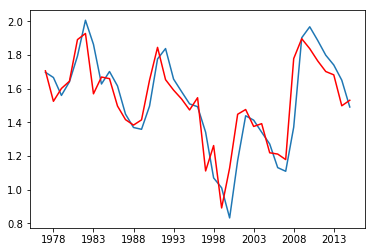

-34.6320642084637


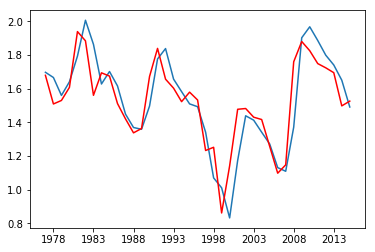

-33.80870346523642


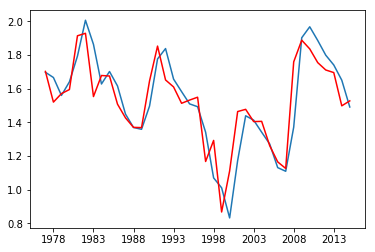

         AIC Modelname
0  14.032423    (0, 0)
0 -19.461690    (0, 1)
0 -24.775604    (1, 0)
0 -34.636634    (1, 1)
0 -34.632064    (2, 0)
0 -33.808703    (2, 1)
Model selected:
(1, 1)
-34.636634408478415


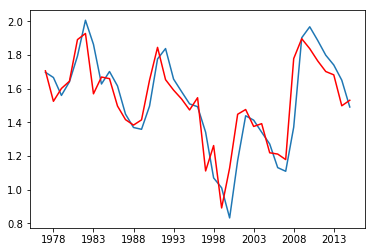

Forecasted values are:
[ 5.1299317   4.95033658  4.83570918  4.76180249  4.71383235]
Predicted existing values are:
2015-01-01    4.623132
2014-01-01    4.474416
2013-01-01    5.376048
2012-01-01    5.483145
2011-01-01    5.838007
2010-01-01    6.279845
2009-01-01    6.661215
2008-01-01    5.921062
2007-01-01    3.251418
2006-01-01    3.359706
2005-01-01    3.385303
2004-01-01    4.023800
2003-01-01    3.957831
2002-01-01    4.376026
2001-01-01    4.254730
2000-01-01    3.093174
1999-01-01    2.440135
1998-01-01    3.533235
1997-01-01    3.039578
1996-01-01    4.693365
1995-01-01    4.365030
1994-01-01    4.659179
1993-01-01    4.910115
1992-01-01    5.224331
1991-01-01    6.327727
1990-01-01    5.210398
1989-01-01    4.115868
1988-01-01    3.990067
1987-01-01    4.121196
1986-01-01    4.467946
1985-01-01    5.255964
1984-01-01    5.306788
1983-01-01    4.803705
1982-01-01    6.871834
1981-01-01    6.626010
1980-01-01    5.175307
1979-01-01    4.958429
1978-01-01    4.595105
1977-01-01

In [16]:
def forecast(model,numSteps):
    #model.forecast(steps=numSteps)
    output = model.forecast(steps=numSteps)[0]
    output.tolist()
    output = np.exp(output)
    np.savetxt('ForecastedValues.csv', output, delimiter=",")
    print('Forecasted values are:')
    print(output)
    return output

def FittedValues(model):
    fittedVal=model.fittedvalues
    PredictedVal=np.exp(fittedVal)
    np.savetxt('PredictedValues.csv', PredictedVal, delimiter=",")
    print('Predicted existing values are:')
    return PredictedVal

def cal_aic_metric(modelname,model):
    global aic_metric
    AIC = model.aic
    aic_dict[modelname] = AIC
    df_error = pd.DataFrame({'Modelname':[modelname],'AIC':[AIC]})
    aic_metric = pd.concat([aic_metric,df_error])
    return aic_metric

def AR_Model(ts, param):
    
    model = tsa.ARMA(ts, order=param)
    results_AR = model.fit(disp=0)
    print(results_AR.aic)
    plt.plot(ts)
    plt.plot(results_AR.fittedvalues, color='red')
    plt.show()
    cal_aic_metric(param,results_AR)
    return results_AR

def chooseModel(df_log):
    p = range(0, 3)
    q = range(0,2)
    pq = list(itertools.product(p, q))
    for param in pq:
        results=AR_Model(df_log, param)
    print(aic_metric)
    aic_metric.to_csv('AICMetric.csv', sep=",")
    paramNew=aic_metric['Modelname'][aic_metric['AIC']==aic_metric['AIC'].min()]
    paramNew=paramNew[0]
    print('Model selected:')
    print(paramNew)
    results_AR_final=AR_Model(df_log, paramNew)
    forecast(results_AR_final, 5)
    print(FittedValues(results_AR_final))
    return results_AR_final

aic_metric = pd.DataFrame({'Modelname':[],'AIC':[]})
aic_dict = {}
chooseModel(df_log)

In [16]:
#df_log_diff=df_log-df_log.shift()

In [17]:
#df_log_diff.dropna(inplace=True)

In [16]:
#test_stationarity(df_log_diff)

# Determine p,q from ACF and PACF plots

In [17]:
lag_acf = acf(df_log, nlags=20)
lag_pacf = pacf(df_log, nlags=20, method='ols')

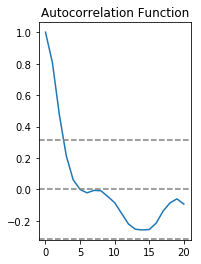

In [18]:
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_log)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_log)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.show()

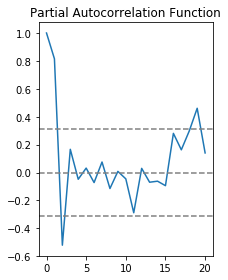

In [19]:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_log)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_log)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

# Models

# AR Model

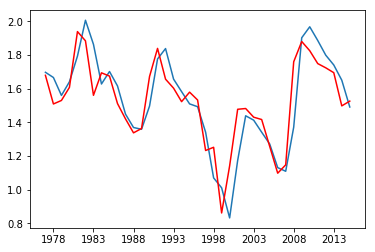

AIC: -34.6321
RSS: 0.7406


In [20]:
model = ARIMA(df_log, order=(2, 0, 0))  
results_AR = model.fit(disp=-1)  
ARAic=results_AR.aic

plt.plot(df_log)
plt.plot(results_AR.fittedvalues, color='red')
plt.show()
print('AIC: %.4f'% results_AR.aic)
print('RSS: %.4f'% sum((results_AR.fittedvalues-df_log.ix[:,0])**2))
#plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-df_log)**2))

# MA Model

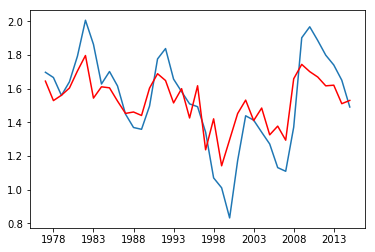

AIC: -19.4617
RSS: 1.1713


In [26]:
model = ARIMA(df_log, order=(0, 0, 1))  
results_MA = model.fit(disp=-1)
MAAic=results_MA.aic
plt.plot(df_log)
plt.plot(results_MA.fittedvalues, color='red')
plt.show()
print('AIC: %.4f'% results_MA.aic)
print('RSS: %.4f'% sum((results_MA.fittedvalues-df_log.ix[:,0])**2))
#plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-df_log)**2))

# Combined Model

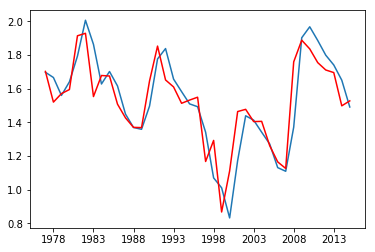

AIC: -33.8087
RSS: 0.7176


In [27]:
model = ARIMA(df_log, order=(2, 0, 1))  
results_ARIMA = model.fit(disp=-1)  
ARIMAAic=results_ARIMA.aic
plt.plot(df_log)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.show()
print('AIC: %.4f'% results_ARIMA.aic)
print('RSS: %.4f'% sum((results_ARIMA.fittedvalues-df_log.ix[:,0])**2))

In [36]:
#np.exp(results_AR.fittedvalues.values.tolist())

# Choose the Model with low AIC

In [28]:
if (ARAic < MAAic) & (ARAic < ARIMAAic):
    out=results_AR.forecast(steps=2)[0]
    print('AR selected')
elif (MAAic < ARAic) & (MAAic < ARIMAAic):
    out=results_MA.forecast(steps=2)[0]
    print('MA selected')
elif (ARIMAAic < ARAic) & (ARIMAAic < MAAic):
    out=results_ARIMA.forecast(steps=2)[0]
    print('ARIMA selected')
listOne=out.tolist()
listOne=np.exp(listOne)
list1=listOne.tolist()
dfList=df.ix[:,0].tolist()
newList=list1+dfList
newList

AR selected


[5.275090031183187,
 4.981769328260585,
 4.441666667,
 5.208333333,
 5.7,
 6.041666667,
 6.591666667,
 7.15,
 6.7,
 3.941666667,
 3.0333333330000003,
 3.1,
 3.566666667,
 3.825,
 4.108333333,
 4.216666667,
 3.233333333,
 2.3,
 2.75,
 2.916666667,
 3.825,
 4.45,
 4.525,
 4.866666667,
 5.241666667,
 6.283333333,
 5.908333333,
 4.466666667,
 3.891666667,
 3.933333333,
 4.258333333,
 5.033333333,
 5.483333332999999,
 5.091666667,
 6.441666667000001,
 7.433333332999999,
 6.0083333329999995,
 5.158333333,
 4.758333333,
 5.291666667,
 5.458333333]

In [41]:
#df_new=pd.DataFrame(data=newList)

In [167]:
index=df.index

In [175]:
dataframe1=pd.read_csv('DC_UnemploymentRate.csv', header=0)

In [171]:
dataframe1.head()

,Year,DC_UnemploymentRate
Year,,
1977-01-01,1977,9.158333
1978-01-01,1978,8.250000
1979-01-01,1979,7.025000
1980-01-01,1980,7.375000
1981-01-01,1981,8.908333


In [176]:
index_vals = pd.to_datetime(dataframe1.ix[:,0], format='%Y')
dataframe1 = dataframe1.set_index(index_vals)
dataframe1 = dataframe1.sort_index()
dataframe1.drop('Year', axis=1, inplace=True)
    
    # dateparse = lambda dates: pd.datetime.strptime(dates, '%Y')
    
    
    # dataframe1 = dataframe1.set_index(dataframe1.ix[:,0])
    # dataframe1.drop('Column 0', axis=1, inplace=True)
    # dataframe1 = dataframe1.sort_index()
ts_log = dataframe1.apply(lambda x: np.log(x))
model = ARIMA(ts_log, order=(2, 0, 3))
print(ts_log)
results_ARIMA = model.fit(disp=-1)
print(results_ARIMA.fittedvalues)
forcasted_values = np.exp(np.array(results_ARIMA.fittedvalues.values.tolist()))
print(forcasted_values)

            DC_UnemploymentRate
Year                           
1977-01-01             2.214664
1978-01-01             2.110213
1979-01-01             1.949475
1980-01-01             1.998096
1981-01-01             2.186987
1982-01-01             2.345804
1983-01-01             2.415914
1984-01-01             2.213754
1985-01-01             2.096995
1986-01-01             2.019338
1987-01-01             1.845827
1988-01-01             1.616082
1989-01-01             1.590934
1990-01-01             1.835245
1991-01-01             2.047693
1992-01-01             2.149822
1993-01-01             2.143003
1994-01-01             2.075266
1995-01-01             2.171907
1996-01-01             2.132192
1997-01-01             2.080483
1998-01-01             2.131203
1999-01-01             1.851076
2000-01-01             1.724254
2001-01-01             1.845827
2002-01-01             1.857599
2003-01-01             1.921813
2004-01-01             2.051985
2005-01-01             1.852384
2006-01-